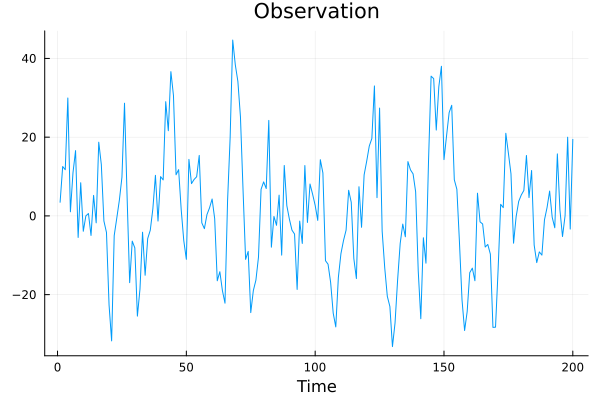

In [3]:
using DSP
using Plots

# Define a function to simulate lfilter behavior
function lfilter(b, a, x)
    y = filt(b, a, x)
    return y
end

# test
N = 200
x = randn(N)
htest = 10 * [1, 0.7, 0.7, 0.7, 0.3, 0]
y = lfilter(htest, [1.0], x) + 0.1 * randn(N)

plot(y, xlabel="Time", title="Observation", legend=false)


In [15]:
using StatsBase
using LinearAlgebra
using Statistics
using Plots
using ToeplitzMatrices

q=5

u = x
d = y
qmax = 18
mmse = zeros(qmax)

for q in 1:qmax
    c = crosscor(u, u)
    Ruu = Toeplitz(c) + 1e-6 * I  # Creating Toeplitz matrix and adding a small constant to the diagonal for regularization
    
    # Manual slicing to get cross-correlation for the specific lag
    Rdu = crosscor(d, u, q)[q:end]
    
    # Ensure that the dimensions are compatible for matrix multiplication
    w = pinv(Ruu) * Rdu  # Using the pseudo-inverse
    sigma2d = mean(d.^2)
    mmse[q] = sigma2d - dot(w, Rdu)
end

println("MMSE: ", mmse)

plot(1:qmax, mmse, xlabel="Order of the filter", ylabel="MMSE", title="MMSE as a function of the length of the identification filter", legend=false)


LoadError: MethodError: no method matching Toeplitz(::Vector{Float64})

[0mClosest candidates are:
[0m  Toeplitz(::AbstractVector, [91m::AbstractVector[39m)
[0m[90m   @[39m [35mToeplitzMatrices[39m [90m~/.julia/packages/ToeplitzMatrices/uvasQ/src/[39m[90m[4mtoeplitz.jl:27[24m[39m
[0m  Toeplitz([91m::AbstractMatrix[39m)
[0m[90m   @[39m [35mToeplitzMatrices[39m [90m~/.julia/packages/ToeplitzMatrices/uvasQ/src/[39m[90m[4mtoeplitz.jl:39[24m[39m


In [35]:
# c = crosscor(u, u)
# c = crosscor(u,u,u)
c = StatsBase.crosscor(u, u); @show typeof(c), length(c)
t = Toeplitz(c,c) .+ 1e-6; @show t

(typeof(c), length(c)) = (Vector{Float64}, 47)
t = [0.026973282369740146 -0.008013326456049494 -0.0334200777485948 -0.05631076291994929 0.06248818074843037 -0.07552331715399367 -0.09443939237994367 0.007457735449070609 0.023654418872353453 0.0014751592419264287 -0.10300601386082411 0.003775183941658327 0.01456589183095247 0.05334145577028028 -0.08663115604776735 0.05819112329391628 -0.04331308464970822 -0.10366295972118078 -0.1783539576557206 0.14040998291785134 -0.05835978232909804 0.03874690178275375 -0.127138652523047 1.000001 -0.127138652523047 0.03874690178275375 -0.05835978232909804 0.14040998291785134 -0.1783539576557206 -0.10366295972118078 -0.04331308464970822 0.05819112329391628 -0.08663115604776735 0.05334145577028028 0.01456589183095247 0.003775183941658327 -0.10300601386082411 0.0014751592419264287 0.023654418872353453 0.007457735449070609 -0.09443939237994367 -0.07552331715399367 0.06248818074843037 -0.05631076291994929 -0.0334200777485948 -0.008013326456049494 0.02697328

47×47 Matrix{Float64}:
  0.0269733   -0.00801333  -0.0334201   …  -0.00801333   0.0269733
 -0.00801333   0.0269733   -0.00801333     -0.0334201   -0.00801333
 -0.0334201   -0.00801333   0.0269733      -0.0563108   -0.0334201
 -0.0563108   -0.0334201   -0.00801333      0.0624882   -0.0563108
  0.0624882   -0.0563108   -0.0334201      -0.0755233    0.0624882
 -0.0755233    0.0624882   -0.0563108   …  -0.0944394   -0.0755233
 -0.0944394   -0.0755233    0.0624882       0.00745774  -0.0944394
  0.00745774  -0.0944394   -0.0755233       0.0236544    0.00745774
  0.0236544    0.00745774  -0.0944394       0.00147516   0.0236544
  0.00147516   0.0236544    0.00745774     -0.103006     0.00147516
 -0.103006     0.00147516   0.0236544   …   0.00377518  -0.103006
  0.00377518  -0.103006     0.00147516      0.0145659    0.00377518
  0.0145659    0.00377518  -0.103006        0.0533415    0.0145659
  ⋮                                     ⋱   ⋮           
  0.00377518   0.0145659    0.0533415   …  -0.

In [7]:
Toeplitz(c)

LoadError: MethodError: no method matching Toeplitz(::Vector{Float64})

[0mClosest candidates are:
[0m  Toeplitz(::AbstractVector, [91m::AbstractVector[39m)
[0m[90m   @[39m [35mToeplitzMatrices[39m [90m~/.julia/packages/ToeplitzMatrices/uvasQ/src/[39m[90m[4mtoeplitz.jl:27[24m[39m
[0m  Toeplitz([91m::AbstractMatrix[39m)
[0m[90m   @[39m [35mToeplitzMatrices[39m [90m~/.julia/packages/ToeplitzMatrices/uvasQ/src/[39m[90m[4mtoeplitz.jl:39[24m[39m


In [5]:
Toeplitz(1:3, [1.,4.,5.])

3×3 Toeplitz{Float64, Vector{Float64}, Vector{Float64}}:
 1.0  4.0  5.0
 2.0  1.0  4.0
 3.0  2.0  1.0